Can we quantitatively identify the vertical bands in carpet plots?

In [1]:
%matplotlib inline
import os.path as op
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits import axes_grid1
import nibabel as nib
import numpy as np
import pandas as pd
from scipy import stats
from nilearn import datasets
from nilearn import signal
from nilearn.masking import apply_mask, compute_epi_mask
from nilearn.image import resample_to_img
from niworkflows_plots import fMRIPlot

In [2]:
ted_dir = '/Users/tsalo/data/TED/'

func_img = nib.load(op.join(ted_dir, 'tsoc_orig.nii'))
mask_img = compute_epi_mask(func_img)
seg_data = np.copy(mask_img.get_data())
for i in range(2, 9):
    idx = np.where(seg_data == 1)
    idx = [j[:27500] for j in idx]
    seg_data[idx[0], idx[1], idx[2]] = i

n_trs = func_img.shape[-1]
tr = 2.
seg_img = nib.Nifti1Image(seg_data, mask_img.affine)
conf_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'P', 'R', 'Ya', 'FD'], data=np.zeros((n_trs, 7)))

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


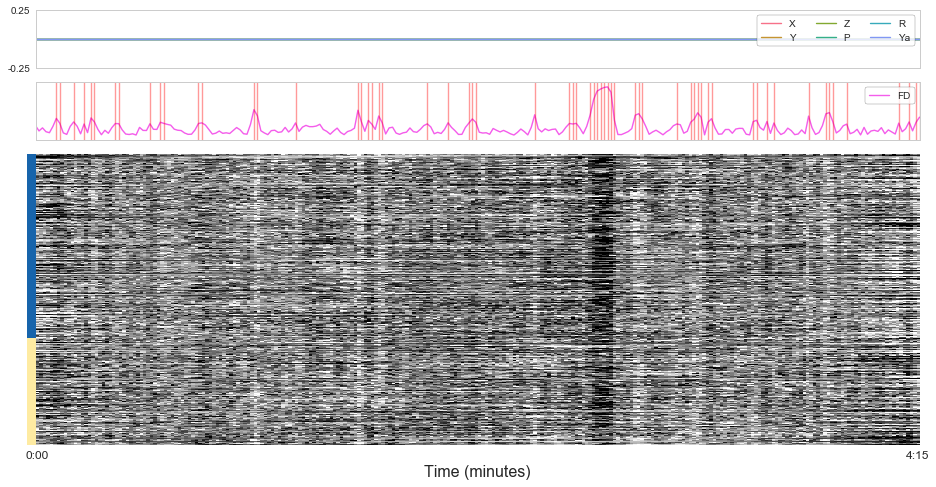

In [3]:
func_img = nib.load(op.join(ted_dir, 'tsoc_orig.nii'))
dat1 = apply_mask(func_img, mask_img)
dat1 = signal.clean(dat1, detrend=True, standardize=True, t_r=tr)
stdev1 = np.mean(dat1, axis=1)
stdev1 = np.abs((stdev1 - np.mean(stdev1)) / np.std(stdev1))

conf_df['FD'] = stdev1

plot = fMRIPlot(func_img, mask_img, tr=tr,
                conf_df=conf_df, seg_nii=seg_img)

fig = plt.figure(figsize=(16, 8))
fig = plot.plot(figure=fig)
fig.tight_layout()
fig.savefig('sandbox/temp.png', dpi=400)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


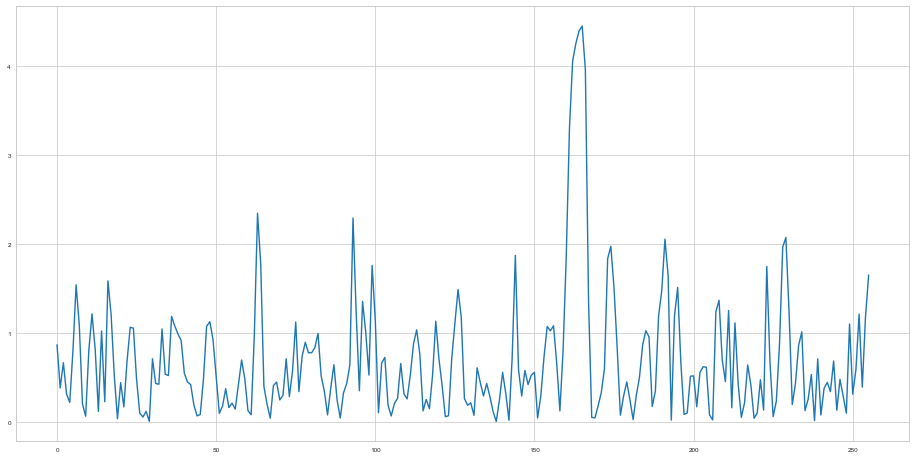

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(stdev1)
fig.show()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


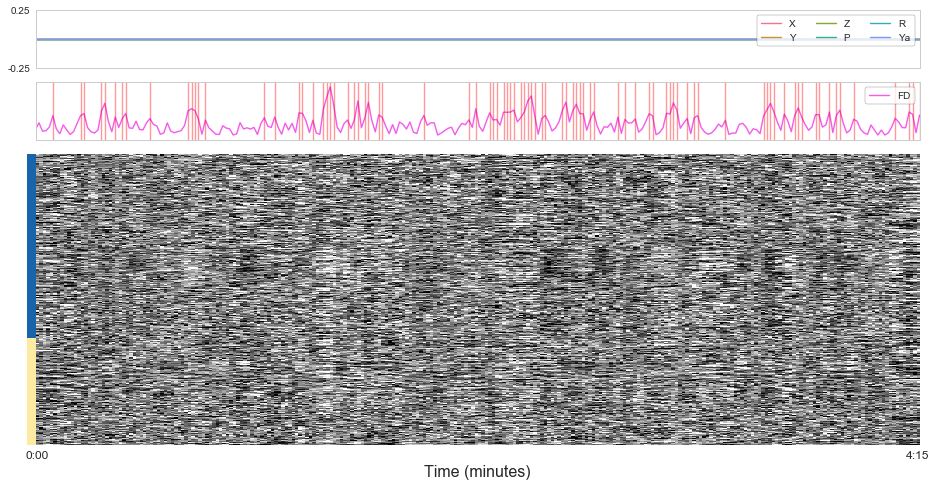

In [5]:
func_img = nib.load(op.join(ted_dir, 'dn_ts_OC_T1c.nii'))
dat2 = apply_mask(func_img, mask_img)
dat2 = signal.clean(dat2, detrend=True, standardize=True, t_r=tr)
stdev2 = np.mean(dat2, axis=1)
stdev2 = np.abs((stdev2 - np.mean(stdev2)) / np.std(stdev2))

conf_df['FD'] = stdev2

plot = fMRIPlot(func_img, mask_img, tr=tr,
                conf_df=conf_df, seg_nii=seg_img)

fig = plt.figure(figsize=(16, 8))
fig = plot.plot(figure=fig)
fig.tight_layout()
fig.savefig('sandbox/temp.png', dpi=400)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


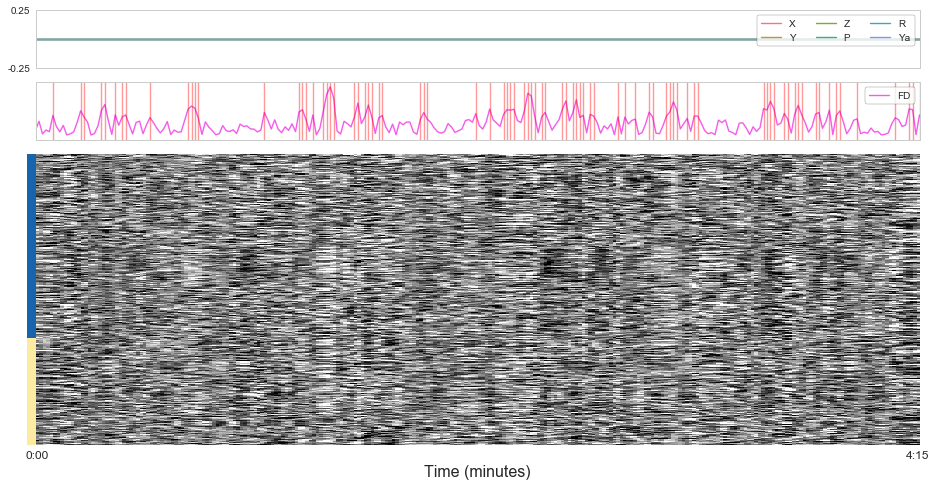

In [6]:
func_img = nib.load(op.join(ted_dir, 'hik_ts_OC_T1c.nii'))
dat2 = apply_mask(func_img, mask_img)
dat2 = signal.clean(dat2, detrend=True, standardize=True, t_r=tr)
stdev2 = np.mean(dat2, axis=1)
stdev2 = np.abs((stdev2 - np.mean(stdev2)) / np.std(stdev2))

conf_df['FD'] = stdev2

plot = fMRIPlot(func_img, mask_img, tr=tr,
                conf_df=conf_df, seg_nii=seg_img)

fig = plt.figure(figsize=(16, 8))
fig = plot.plot(figure=fig)
fig.tight_layout()
fig.savefig('sandbox/temp.png', dpi=400)